# Flight data Exploration
## by Aravind

This project is structured as follows:
1. <a href="#assess">Assessing the Data</a>
2. <a href='#wrangle'>Preliminary wrangling </a>
3. <a href='#univariate'>Univariate exploration </a>
4. <a href='#biivariate'>Bivariate exploration </a>
5. <a href='#multivariate'>Multivariate exploration </a>


The flights dataset have been used in this project which will be explored using many level of visualisation. This data reports <br> Aggregated version of data has been used which is obtained from https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp and it contains details of the arrival points of flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.<br> 

### Assessing the data
<a id='assess'/>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#importing the dataset
df=pd.read_csv('689463768_122020_1644_airline_delay_causes.csv')

In [6]:
#Assessing the first 5 rows
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,21.06,6.44,...,45.92,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0,NaN
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,14.09,2.61,...,10.05,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0,NaN
2,2004,1,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,27.60,0.42,...,17.12,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0,NaN
3,2004,1,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334.0,78.0,20.14,2.02,...,16.45,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0,NaN
4,2004,1,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217.0,47.0,8.08,0.44,...,16.59,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0,NaN


In [7]:
#checking on the column types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292669 entries, 0 to 292668
Data columns (total 22 columns):
year                   292669 non-null int64
 month                 292669 non-null int64
carrier                292669 non-null object
carrier_name           292669 non-null object
airport                292669 non-null object
airport_name           292669 non-null object
arr_flights            292207 non-null float64
arr_del15              291981 non-null float64
carrier_ct             292207 non-null float64
 weather_ct            292207 non-null float64
nas_ct                 292207 non-null float64
security_ct            292207 non-null float64
late_aircraft_ct       292207 non-null float64
arr_cancelled          292207 non-null float64
arr_diverted           292207 non-null float64
 arr_delay             292207 non-null float64
 carrier_delay         292207 non-null float64
weather_delay          292207 non-null float64
nas_delay              292207 non-null float64
secu

In [8]:
#checking on the duplicated values
sum(df.duplicated())

0

In [9]:
#unique value counts for carrier
df['carrier'].value_counts()

OO    34667
EV    26799
DL    25505
MQ    22882
AA    18027
UA    17443
WN    15816
YV    13097
AS    11653
OH    11065
9E    10748
US    10698
F9    10656
B6    10535
NW     8084
XE     7375
FL     6956
CO     6917
G4     4287
RU     4136
HA     3221
YX     3086
NK     2906
DH     1924
HP     1581
VX     1428
TZ      924
AQ      253
Name: carrier, dtype: int64

In [10]:
#unique value counts for airport column
df['airport'].value_counts()

DTW    2806
LAX    2793
LAS    2774
MCI    2748
DCA    2736
PIT    2724
PHX    2717
ATL    2716
RDU    2714
SAN    2699
DFW    2698
DEN    2698
IND    2697
BOS    2692
MSY    2690
LGA    2684
AUS    2656
PHL    2652
MSP    2627
ORD    2607
STL    2546
SFO    2534
EWR    2532
SEA    2499
BWI    2485
MCO    2472
IAD    2463
CLE    2463
BNA    2439
OMA    2437
       ... 
SOP      15
MWH      13
UTM      13
BFM      13
IFP      13
PGV      12
RIW      12
SHR      12
DDC      11
HKY      10
DEC      10
MKK      10
LNY      10
FOE       9
CDB       8
DUT       8
MTH       5
FMN       3
IPT       3
ALS       2
JST       1
SKA       1
ENV       1
RCA       1
MKC       1
CBM       1
YNG       1
FNL       1
TKI       1
GLH       1
Name: airport, Length: 413, dtype: int64

<b> Wrangling steps needed </b>
<ol>
    <li> Null values present </li>
    <li>Change carrier, aiport and year columns to categorical type.</li>
    <li> Need to remove the extra column Unnmaed:21 </li>
</ol>    

### Wrangling
<a id='wrangle'/>

In [11]:
#taking a copy of the dataset
df_clean=df.copy()

In [12]:
#taking out Null values and 'Unnmaed: 21 column'
nan_index=df_clean[(df_clean['arr_del15'].isna())|(df_clean[' arr_delay'].isna())].index
df_clean.drop(index=nan_index,columns='Unnamed: 21',inplace=True)

In [13]:
df_clean[(df_clean[' arr_delay'].isna())]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


In [14]:
#checking out the whether presence of Nan values
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291981 entries, 0 to 292668
Data columns (total 21 columns):
year                   291981 non-null int64
 month                 291981 non-null int64
carrier                291981 non-null object
carrier_name           291981 non-null object
airport                291981 non-null object
airport_name           291981 non-null object
arr_flights            291981 non-null float64
arr_del15              291981 non-null float64
carrier_ct             291981 non-null float64
 weather_ct            291981 non-null float64
nas_ct                 291981 non-null float64
security_ct            291981 non-null float64
late_aircraft_ct       291981 non-null float64
arr_cancelled          291981 non-null float64
arr_diverted           291981 non-null float64
 arr_delay             291981 non-null float64
 carrier_delay         291981 non-null float64
weather_delay          291981 non-null float64
nas_delay              291981 non-null float64
secu

In [15]:
#encoding the numerical months into textual months
df_clean['month']=pd.cut(df_clean[' month'],12,labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [16]:
#checking out the value counts for the encoded months
df_clean['month'].value_counts()

Dec    25042
Aug    25037
Jun    25033
Sep    24888
Jul    24831
Nov    24650
Oct    24513
Jan    23873
Mar    23674
Feb    23601
Apr    23512
May    23327
Name: month, dtype: int64

In [17]:
#changing the columns into category
#cols=['year','carrier','airport','month']
#for  c in cols:
#    df_clean[c]=df_clean[c].astype('category')

In [18]:
#checking out the carrier value counts
df_clean['carrier'].value_counts()

OO    34572
EV    26696
DL    25443
MQ    22864
AA    18018
UA    17409
WN    15816
YV    13062
AS    11651
OH    10968
9E    10694
US    10692
F9    10626
B6    10527
NW     8068
XE     7366
FL     6955
CO     6908
G4     4224
RU     4134
HA     3220
YX     3073
NK     2897
DH     1923
HP     1579
VX     1425
TZ      918
AQ      253
Name: carrier, dtype: int64

In [19]:
#renaming out the columns
df_clean.rename(columns={'arr_flights':'Arrived_flights','arr_del15':'Delayed_Flight_Count','carrier_ct':'Delayed_carrier_count',
                        ' weather_ct':'Delayed_weather_count','nas_ct':'Delayed_NAS_count','security_ct':'Delayed_security_count', 'late_aircraft_ct':'Delayed_late_count', 'arr_cancelled': 'ArrivalCancelled',
       ' arr_delay':'Delayed_arrival_mins', ' carrier_delay':'Delayed_carrier_mins','weather_delay':'Delayed_weather_mins', 'nas_delay':'Delayed_NAS_mins',
       'security_delay':'Delayed_security_mins', 'late_aircraft_delay':'Delayed_Aircarft_mins'},inplace=True)

In [20]:
#checking the changes
df_clean.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'Arrived_flights', 'Delayed_Flight_Count', 'Delayed_carrier_count',
       'Delayed_weather_count', 'Delayed_NAS_count', 'Delayed_security_count',
       'Delayed_late_count', 'ArrivalCancelled', 'arr_diverted',
       'Delayed_arrival_mins', 'Delayed_carrier_mins', 'Delayed_weather_mins',
       'Delayed_NAS_mins', 'Delayed_security_mins', 'Delayed_Aircarft_mins',
       'month'],
      dtype='object')

In [21]:
#rounding the count columns
cols=['Delayed_Flight_Count', 'Delayed_carrier_count',
       'Delayed_weather_count', 'Delayed_NAS_count', 'Delayed_security_count',
       'Delayed_late_count']
for _ in cols:
    df_clean[cols]=df_clean[cols].astype('int64')

In [22]:
#checking the changes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291981 entries, 0 to 292668
Data columns (total 22 columns):
year                      291981 non-null int64
 month                    291981 non-null int64
carrier                   291981 non-null object
carrier_name              291981 non-null object
airport                   291981 non-null object
airport_name              291981 non-null object
Arrived_flights           291981 non-null float64
Delayed_Flight_Count      291981 non-null int64
Delayed_carrier_count     291981 non-null int64
Delayed_weather_count     291981 non-null int64
Delayed_NAS_count         291981 non-null int64
Delayed_security_count    291981 non-null int64
Delayed_late_count        291981 non-null int64
ArrivalCancelled          291981 non-null float64
arr_diverted              291981 non-null float64
Delayed_arrival_mins      291981 non-null float64
Delayed_carrier_mins      291981 non-null float64
Delayed_weather_mins      291981 non-null float64
Delayed_N

### Observation
<b> What is the structure of your dataset? </b> <br>
The cleaned dataset has 291981 rows and 21 columns.

### What is/are the main feature(s)/questions of interest in your dataset?
<ol>
<li> Airlines causing most delays </li>
<li>Arrival airports having most delays</li>
<li>Airlines with no delays </li>    
<li>Most Weather delays in Arrival airports</li>
<li>Which season has worst delays
<li>Year-Year comparison on delays
<li>Security delays on arrival airports indicating Problamtic zones
<li> How security scrutiny has improved/tightened over the years?
<li> Which airline has the longest security measures taken?
</ol>


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
All the delay parameters would help in identifying the performance of airlines and arrival airports  

## Univariate Exploration

<b> Frequently operated Carriers over the years</b>

In [23]:
df_carr_ct=df_clean['carrier_name'].value_counts()
df_carr_ct=pd.DataFrame(df_carr_ct)
df_carr_ct.sort_values(by='carrier_name',inplace=True)
df_carr_ct.head()

,carrier_name
Aloha Airlines Inc.,253
Independence Air,670
ATA Airlines d/b/a ATA,918
Atlantic Coast Airlines,1253
ExpressJet Airlines LLC,1419


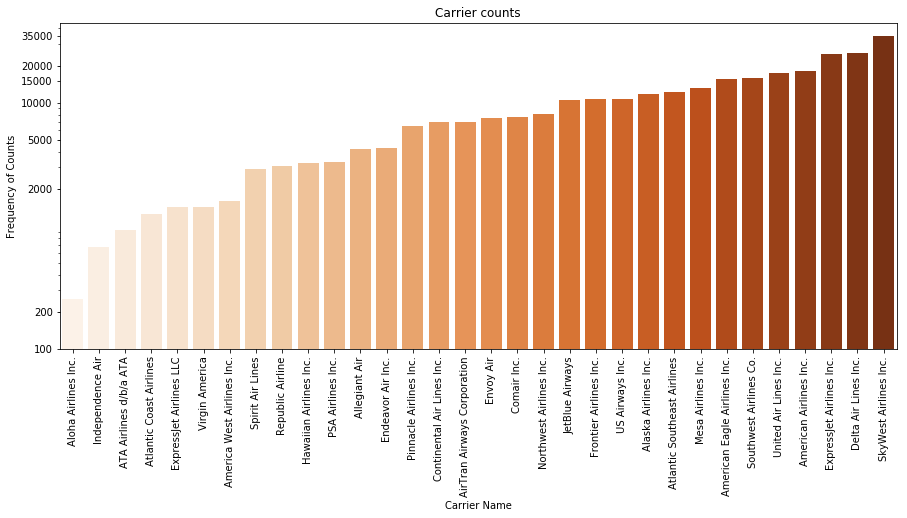

In [26]:
plt.figure(figsize=[15,6])
ticks=[100,200,2000,5000,10000,15000,20000,35000]
labels=['{}'.format(v) for v in ticks]
sb.countplot(df_clean['carrier_name'],order=df_carr_ct.index,palette='Oranges')
plt.title('Carrier counts')
plt.xlabel('Carrier Name')
plt.ylabel('Frequency of Counts')
plt.yscale('log')
plt.xticks(rotation=90)
plt.yticks(ticks,labels);

<b> The carrier distribution with respect to the number of journeys has been analysed 
and it can be seen that SkyWest airlines had many takers whereas the Aloha Airlines had the least.
Would be interesting to check out whether the delay has been associated with the number of takers </b>


<b> Frequently occured Air delay counts </b>

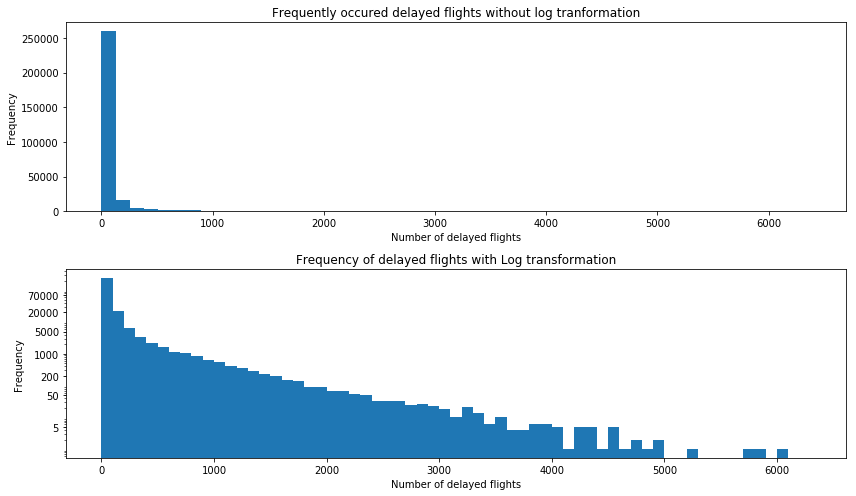

In [33]:
plt.figure(figsize=[12,7])
plt.subplot(2,1,1)
plt.hist(data=df_clean,x='Delayed_Flight_Count',bins=50);
plt.xlabel('Number of delayed flights')
plt.ylabel('Frequency')
plt.title('Frequently occured delayed flights without log tranformation');
plt.subplot(2,1,2)
bins=np.arange(0,max(df_clean['Delayed_Flight_Count'])+1,100)
ticks=[5,50,200,1000,5000,20000,70000]
labels=['{}'.format(v) for v in ticks]
plt.hist(data=df_clean,x='Delayed_Flight_Count',bins=bins);
plt.yscale('log')
plt.xlabel('Number of delayed flights')
plt.ylabel('Frequency')
plt.title('Frequency of delayed flights with Log transformation')
plt.yticks(ticks,labels);
plt.tight_layout()


<b> Frequency on Number of flights have been analysed using a Histogram, and it looks to have spikes around 0-1000  ,between 3000 and 3500,between 4000 and 5000 which indicates it is a multi-modal distribution. The Log transformation have been performed to magnify the changes.</b>

<b> Frequency of Seasonal operation </b>

In [37]:
#taking out the number of flights for each months
df_mon_ct=df_clean.groupby('month')['Arrived_flights'].sum()
df_mon_ct=pd.DataFrame(df_mon_ct).sort_values(by='month')
df_mon_ct

,Arrived_flights
month,
Jan,9130918.0
Feb,8449425.0
Mar,9654836.0
Apr,9009695.0
May,9122730.0
Jun,9762714.0
Jul,10223659.0
Aug,10194629.0
Sep,9301662.0


Text(0.5,1,'Month wise distribution')

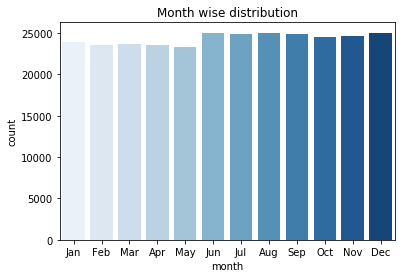

In [50]:
sb.countplot(df_clean['month'],order=df_mon_ct.index,palette='Blues')
plt.title('Month wise distribution')

<b> The frequency of flights with respect to months have been analysed. 
Suprisingly the frequency for all the months are almost equal. 
However July and Auguest has pipped the rest of the months slightly with more than 10 million flights being the holiday seasons. 
Would be interesting if this remains the same with respect to years</b>

<b> Checking out the outliers on the different delay counts </b>

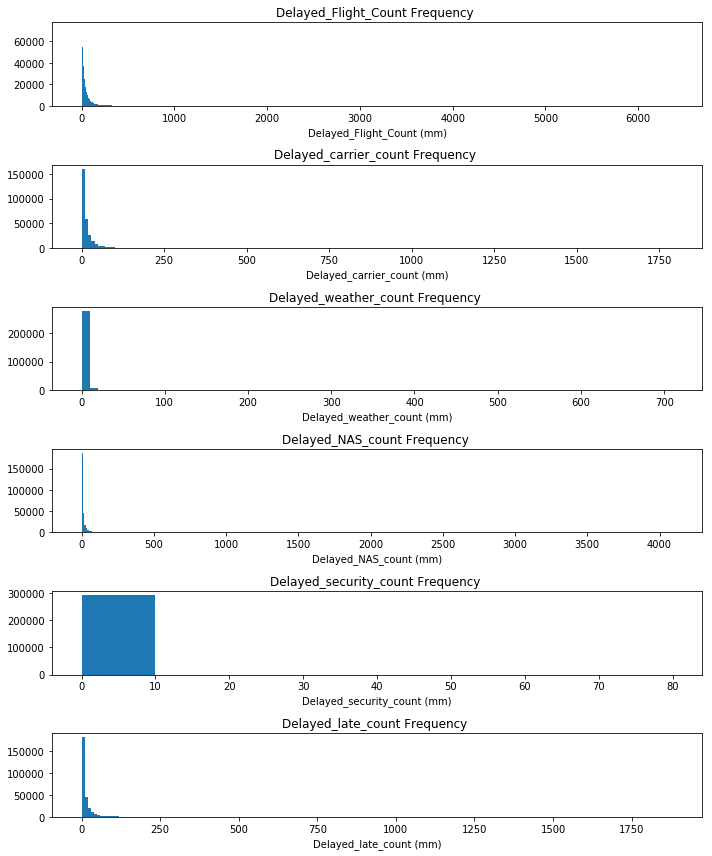

In [26]:
#Checking out the outliers on the different delay counts
fig, ax = plt.subplots(nrows=6,figsize = [10,12])
plt.subplots_adjust(top=2.0,bottom=1.0)

variables = ['Delayed_Flight_Count', 'Delayed_carrier_count',
       'Delayed_weather_count', 'Delayed_NAS_count', 'Delayed_security_count',
       'Delayed_late_count']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_clean[var]), max(df_clean[var])+0.1, 10)
    ax[i].hist(data = df_clean, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))
    ax[i].set_title('{} Frequency '.format(var))
plt.tight_layout()

In [40]:
#analysing the data for outliers
outliers=df_clean[(df_clean['Delayed_carrier_count'] >150) |(df_clean ['Delayed_NAS_count']>100)| (df_clean['Delayed_security_count']>20)|(df_clean['Delayed_weather_count']>80)  | (df_clean['Delayed_late_count']>200)] 
outliers

,year,month,carrier,carrier_name,airport,airport_name,Arrived_flights,Delayed_Flight_Count,Delayed_carrier_count,Delayed_weather_count,...,Delayed_late_count,ArrivalCancelled,arr_diverted,Delayed_arrival_mins,Delayed_carrier_mins,Delayed_weather_mins,Delayed_NAS_mins,Delayed_security_mins,Delayed_Aircarft_mins,month
18,2004,1,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",603.0,180,27,5,...,23,15.0,0.0,7357.0,1512.0,335.0,4125.0,0.0,1385.0,Jan
21,2004,1,DL,Delta Air Lines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",3012.0,756,163,33,...,130,38.0,1.0,31310.0,8466.0,2516.0,13218.0,100.0,7010.0,Jan
39,2004,1,EV,Atlantic Southeast Airlines,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",7014.0,1291,267,169,...,81,183.0,0.0,71539.0,16732.0,12373.0,38771.0,103.0,3560.0,Jan
60,2004,1,EV,Atlantic Southeast Airlines,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",4322.0,582,152,91,...,62,128.0,26.0,31531.0,10027.0,7696.0,10580.0,134.0,3094.0,Jan
134,2004,1,FL,AirTran Airways Corporation,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",4644.0,1213,101,10,...,343,70.0,2.0,67596.0,5926.0,1111.0,38514.0,0.0,22045.0,Jan
209,2004,1,HP,America West Airlines Inc.,LAS,"Las Vegas, NV: McCarran International",2685.0,612,162,15,...,185,52.0,0.0,26948.0,9688.0,1046.0,7512.0,131.0,8571.0,Jan
223,2004,1,HP,America West Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",5603.0,841,233,32,...,217,115.0,5.0,44575.0,18493.0,3966.0,10641.0,447.0,11028.0,Jan
246,2004,1,MQ,American Eagle Airlines Inc.,BOS,"Boston, MA: Logan International",1712.0,417,60,13,...,222,172.0,0.0,22977.0,5392.0,754.0,4595.0,15.0,12221.0,Jan
262,2004,1,MQ,American Eagle Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",5828.0,787,85,41,...,356,118.0,24.0,44560.0,9243.0,6650.0,11404.0,27.0,17236.0,Jan
290,2004,1,MQ,American Eagle Airlines Inc.,LGA,"New York, NY: LaGuardia",1485.0,440,53,15,...,136,140.0,0.0,24417.0,3144.0,1793.0,11050.0,172.0,8258.0,Jan


<b> Though from the above plot, there can seen quite a few outliers for each of the delay counts feature variables these points are valid points as there can be occurances in flight journeys, hence am opting out not take out these outliers </b>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 The number of flight delays was visualized with the log transformed plot on the y axis and it can be inferred that the there are multiple spikes and it follows multi-modal distribution. Also the Airline and Airport performance in terms of delays and how the various delays have changed over the years will be focused on the remaining analysis of this project.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


On checking the delay count variables, there were few outliers but they were treated as valid points as there are possibilities to attain those numbers especially in an aggregated data.

## Bivariate Exploration


In [27]:
#creating function for grouping variables based on mean
def custom_grouping_mean(var1,var2,**kwargs):
    df_gr=df_clean.groupby(var1)[var2].mean()
    df_gr=pd.DataFrame(df_gr)
    df_gr.reset_index(inplace=True)
    df_gr.sort_values(by=var2,inplace=True,ascending=True)
    return df_gr

In [28]:
#creating functions for grouping for bar plots
def custom_plots(x,y,xlabel,ylabel,title,ax=None,**kwargs):
    if ax is None:
        plt.gca()
    ax=sb.barplot(x,y,palette='Blues')
    plt.xticks(rotation=80)
    ax.set(xlabel=xlabel,ylabel=ylabel,title=title);
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.title(title,fontsize=15)
    return ax
    

<b> Airlines causing most delays</b>

In [43]:
#grouping based on delays for airlines
df_carr_mean=custom_grouping_mean('carrier_name','Delayed_arrival_mins')
df_carr_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 3 to 27
Data columns (total 2 columns):
carrier_name            32 non-null object
Delayed_arrival_mins    32 non-null float64
dtypes: float64(1), object(1)
memory usage: 768.0+ bytes


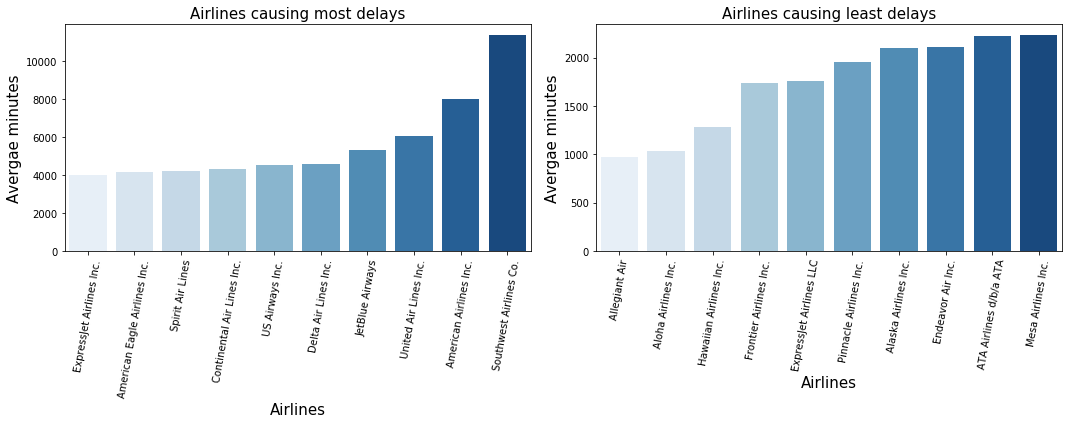

In [64]:
#plotting the most and least delays
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
custom_plots(df_carr_mean['carrier_name'].tail(10),df_carr_mean['Delayed_arrival_mins'].tail(10),'Airlines','Avergae minutes','Airlines causing most delays')
plt.subplot(1,2,2)
custom_plots(df_carr_mean['carrier_name'].head(10),df_carr_mean['Delayed_arrival_mins'].head(10),'Airlines','Avergae minutes','Airlines causing least delays')
plt.tight_layout()

<b> The airlines SouthWest Airlines and American Airlines have caused the most delays while the allegiant and Aloha airlines have resulted in the least average delays across the years. Would be interesting to analyse this across the years.</b>

<b>  Average of Operated flights for Carrier </b> 

In [169]:

p=custom_grouping_mean('carrier','Arrived_flights')

Text(0,0.5,'Average Number of flights')

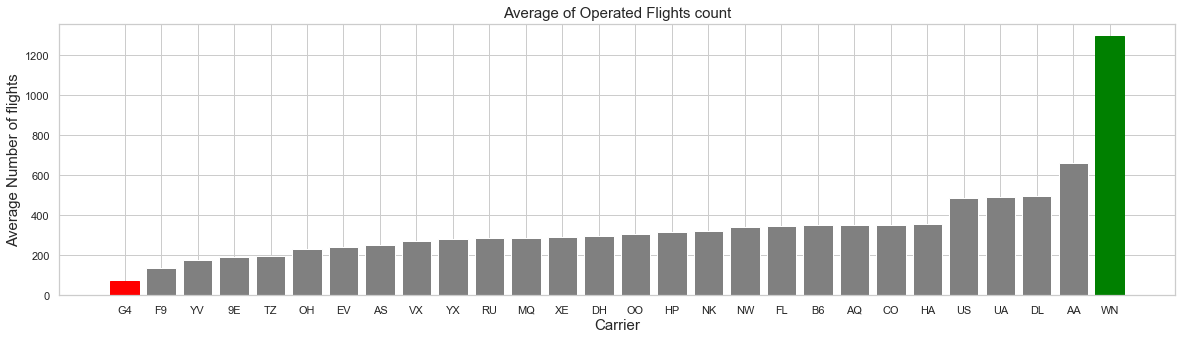

In [173]:
plt.figure(figsize=[20,5])
plot=plt.bar(p['carrier'],p['Arrived_flights'],color='Grey')
plot[-1].set_color('Green')
plot[0].set_color('red')

plt.title('Average of Operated Flights count',fontsize=15)
plt.xlabel('Carrier',fontsize=15)
plt.ylabel('Average Number of flights',fontsize=15)

<b> As it can be seen WN ie., Southwest Airlines stands out as the frequently flown airline followed by AA (American Airlines) and DL (Delta Airlines). The least operated flight is the Allegiant Airline</b>

<b> Arrival airports having most delays</b>

In [44]:
#grouping based on delays at airports
df_air_mean=custom_grouping_mean('airport','Delayed_arrival_mins')
df_air_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 150 to 281
Data columns (total 2 columns):
airport                 411 non-null object
Delayed_arrival_mins    411 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.6+ KB


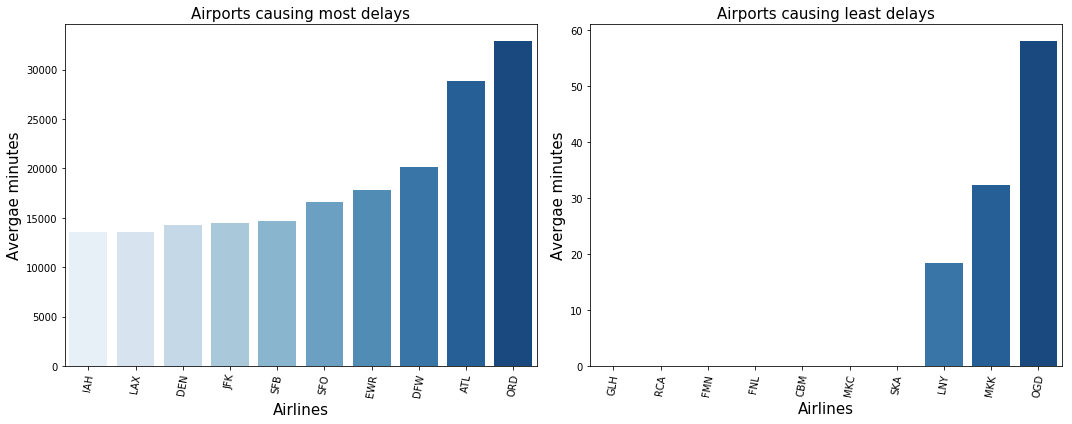

In [66]:
#plotting the delays for airports
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
custom_plots(df_air_mean['airport'].tail(10),df_air_mean['Delayed_arrival_mins'].tail(10),'Airlines','Avergae minutes','Airports causing most delays')
plt.subplot(1,2,2)
custom_plots(df_air_mean['airport'].head(10),df_air_mean['Delayed_arrival_mins'].head(10),'Airlines','Avergae minutes','Airports causing least delays')
plt.tight_layout()

<b> ORD has the highest delay for a arrival airport, while GLH,RCA,FMN,FNL,CBM,MKC have zero delay for arrival airports. It would be interesting to see the factors that are influencing the delays. Would be interesting to analyse the security delays this across the years.  </b> 

<b> Factors which influence the arrival delay </b>

In [30]:
df_delay=df_clean.groupby('year')['Delayed_carrier_mins', 'Delayed_weather_mins',
       'Delayed_NAS_mins', 'Delayed_security_mins', 'Delayed_Aircarft_mins'].mean()
df_delay.columns

Index(['Delayed_carrier_mins', 'Delayed_weather_mins', 'Delayed_NAS_mins',
       'Delayed_security_mins', 'Delayed_Aircarft_mins'],
      dtype='object')

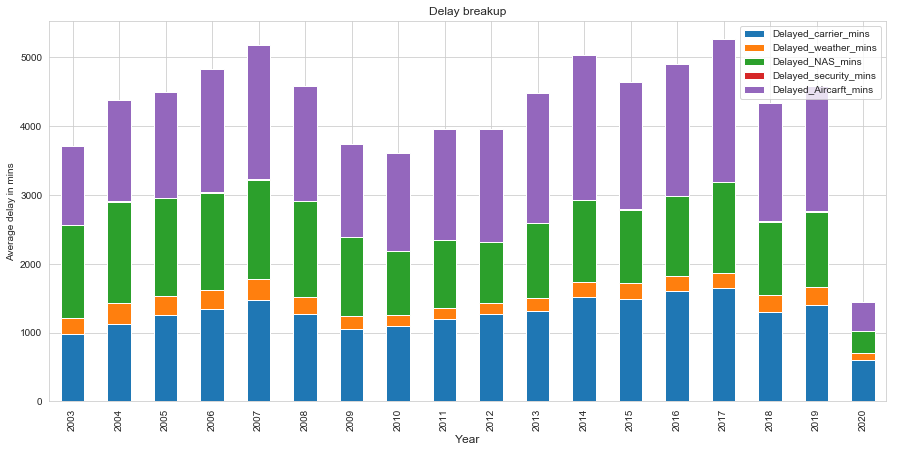

In [31]:
sb.set_style("whitegrid")
plot=df_delay.plot(kind='bar', stacked=True,figsize=(15, 7))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average delay in mins')
plt.title('Delay breakup');

<b> The above plot shows the contribution of each delay in the total delay. Late aircraft delay and carrier delay have been the highest contributers in the arrival delays, while security delay and weather delay have been the least among the arrival delays which shows that the delays have been largely due to operational delays of the carriers</b>

<b> Most Weather delays in Arrival airports </b> 

In [70]:
#grouping Airports based on weather delays
df_weather=custom_grouping_mean('airport','Delayed_weather_mins')
df_weather.tail()

,airport,Delayed_weather_mins
347,SFB,947.111111
92,CVG,959.157134
281,ORD,1242.169101
103,DFW,1283.501669
23,ATL,1513.725331


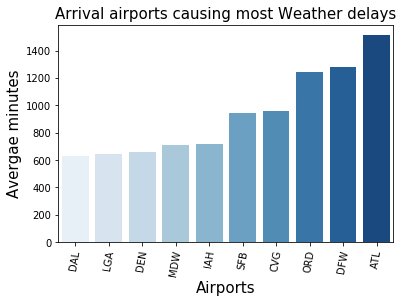

In [72]:
#plotting most weather delayed airports
custom_plots(df_weather['airport'].tail(10),df_weather['Delayed_weather_mins'].tail(10),'Airports','Avergae minutes','Arrival airports causing most Weather delays')

<b> Airports ATL,DFW and ORD have been causing the most delays which could suggest the airports could have been along the coatal/tropical 
climate where cyclones, Hurricanes or extreme weather conditions </b>

<b> Factors contibuting to NAS delay </b>    

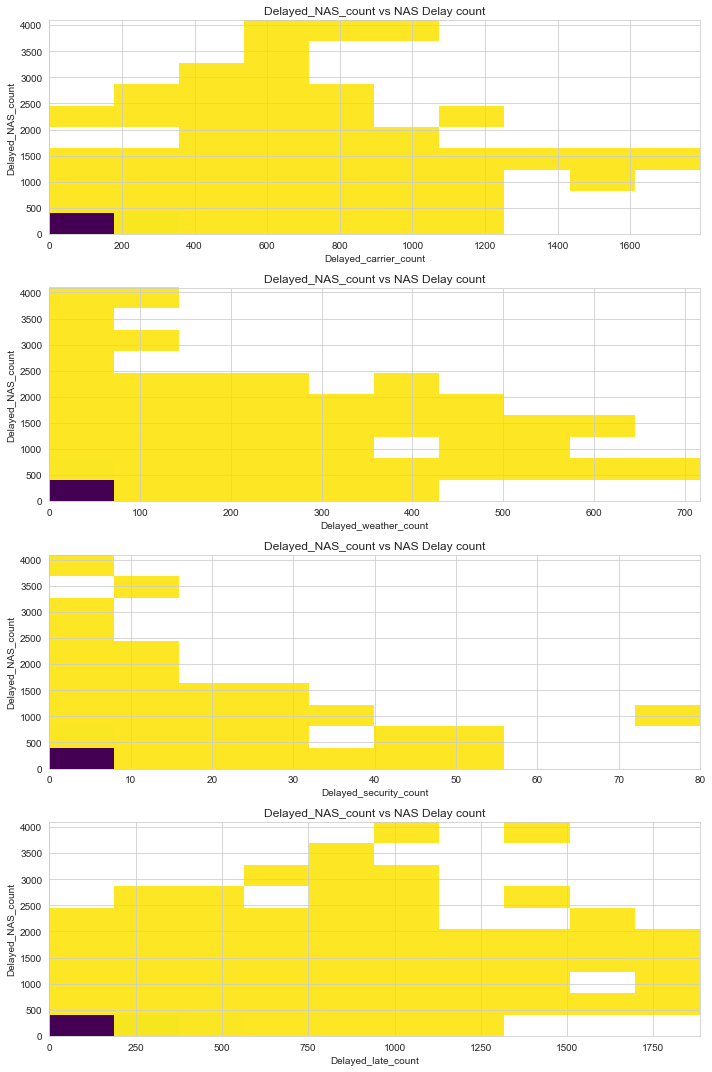

In [35]:
#plotting the contributing factors for NAS delays
fig, ax = plt.subplots(nrows=4,figsize = [10,15])

variables = ['Delayed_carrier_count',
       'Delayed_weather_count', 'Delayed_security_count',
       'Delayed_late_count']
for i in range(len(variables)):
    var = variables[i]
    y='Delayed_NAS_count'
    ax[i].hist2d(data = df_clean, x = var,y=y,cmin=0.5, cmap='viridis_r')
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('{}'.format(y))
    ax[i].set_title('{} vs NAS Delay count'.format(y))
plt.tight_layout()


<b> The National Airspace system  NAS delays which accounts to delays due to  airport oper ations, heavy traffic volume, air traffic control, etc. The factors contributing to NAS has been visualized from which all the delay parameters has an equal effect for the maximum effect ie., between 0-500 counts of Carrier, security, weather and late aircraft have accounted max delay counts in NAS delays. But the more number of NAS delays have occured due to Late aircraft delay and Carrier delay which accounts to the flight company's effiecieny</b>

<b> Number of arrived flights vs number of delayed flights </b>

Text(0,0.5,'# of delayed flights')

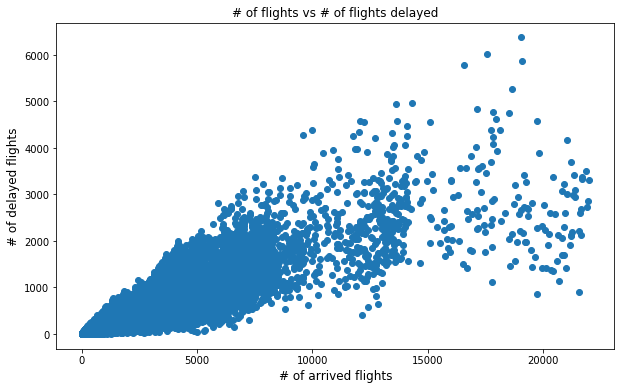

In [75]:
#visualizing the relation between number of flights with number of delayed flights
plt.figure(figsize=[10,6])
plt.scatter(df_clean['Arrived_flights'],df_clean['Delayed_Flight_Count'])
plt.title('# of flights vs # of flights delayed',fontsize=12)
plt.xlabel('# of arrived flights',fontsize=12)
plt.ylabel('# of delayed flights',fontsize=12)

<b> As expected the number of delayed flights have increased with the number of flight services increasing </b>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

As expected the the delay related to carrier have been the major contributor for the delays which reflects that either the aircraft availbility or operational effiency have been below par. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The carrier delays has accounted to NAS delay on the whole. Also it can be noted that the average delay time has not increased linearly over the years, which indicates that air traffic has been maintained well over the years though the number flights would have increased.

## Multivariate Exploration


<b> In the Bivariate section, the flight services which had most and least years was explored. Here we will see it for individual years</b> <br> 
<b> Airlines with their Delayed mins across the years</b>


In [76]:
#custom function for grouping by three variables 
def custom_grouping_mean2(var1,var2,var3,**kwargs):
    df_gr=df_clean.groupby([var1,var2])[var3].mean()
    df_gr=pd.DataFrame(df_gr)
    df_gr.reset_index(inplace=True)
    df_gr.sort_values(by=var3,inplace=True)
    return df_gr

In [108]:
#applying the above functions to create 
df_mon=custom_grouping_mean2('year','carrier','Delayed_arrival_mins')

A:\ANACONDA\New folder\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


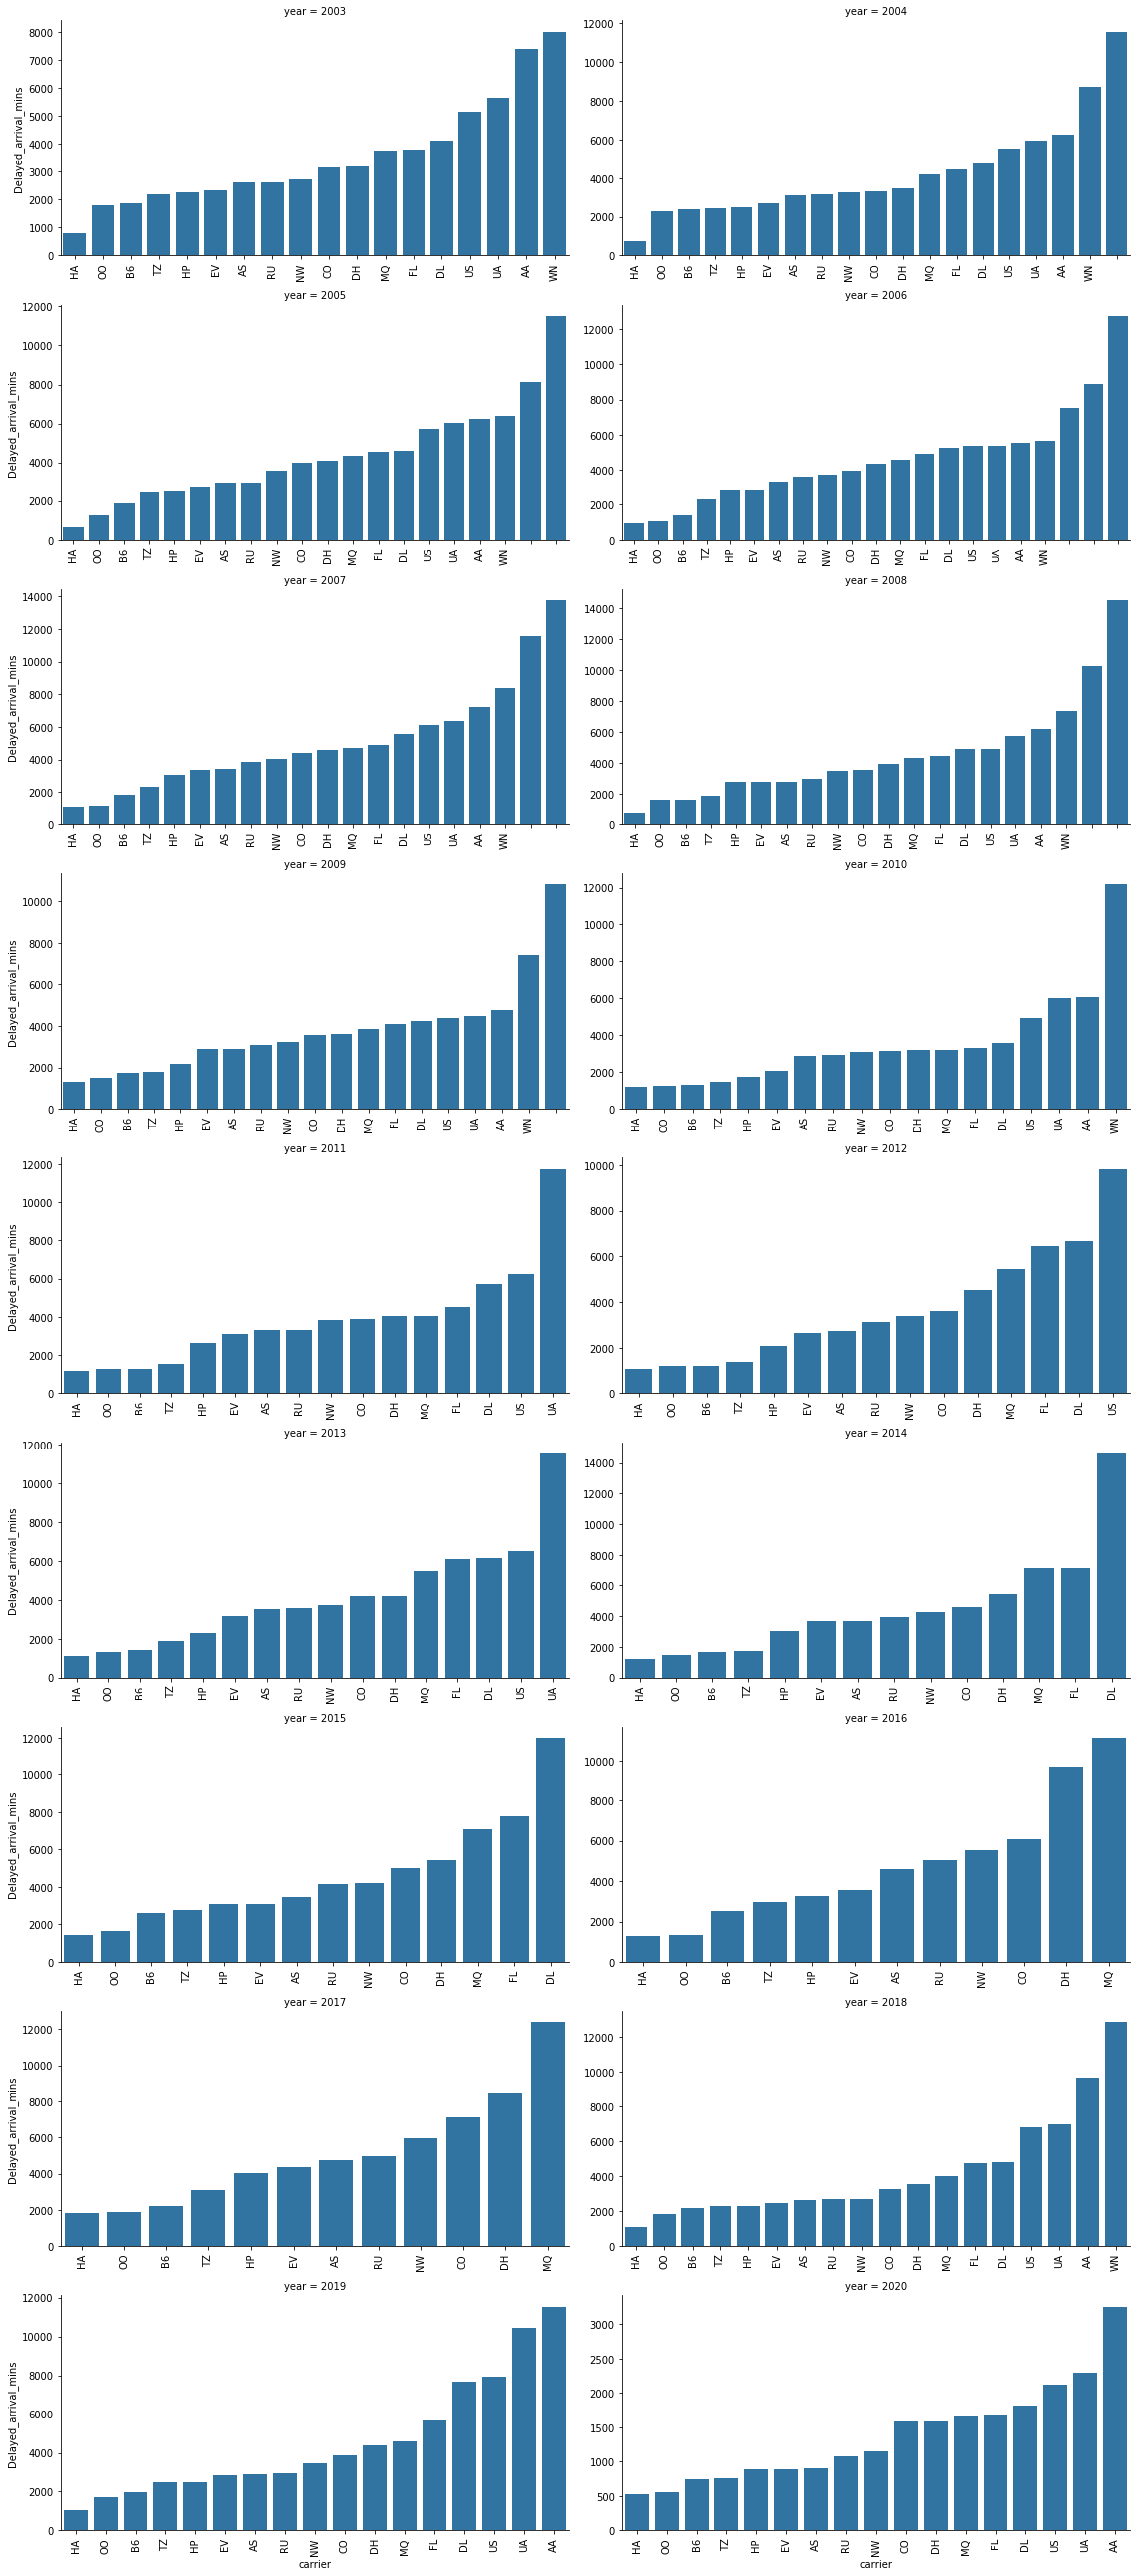

In [109]:
#creating facet charts with bar plots
g=sb.FacetGrid(data=df_mon,col='year',height=4,sharex=False,sharey=False,aspect=2,col_wrap=2,margin_titles=True)
g.map(sb.barplot,'carrier','Delayed_arrival_mins')
g.set_xticklabels(rotation=90)
plt.tight_layout()

<b> From the above plot it can be inferred that HA airlines ie., Hawaiian Airlines Inc have the least delay and they have maintained it across the years, while the maximum delay for majority of the years have been WN which is Southwest Airlines. </b>

<b> Now we will look into how security has beefed up over the years in the arrival airports, as we have seen the airports having most delays and the least delay </b>

In [82]:
#grouping by security delay in mins
df_secu=custom_grouping_mean2('year','airport','Delayed_security_mins')
df_secu.shape[0]

5658

A:\ANACONDA\New folder\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


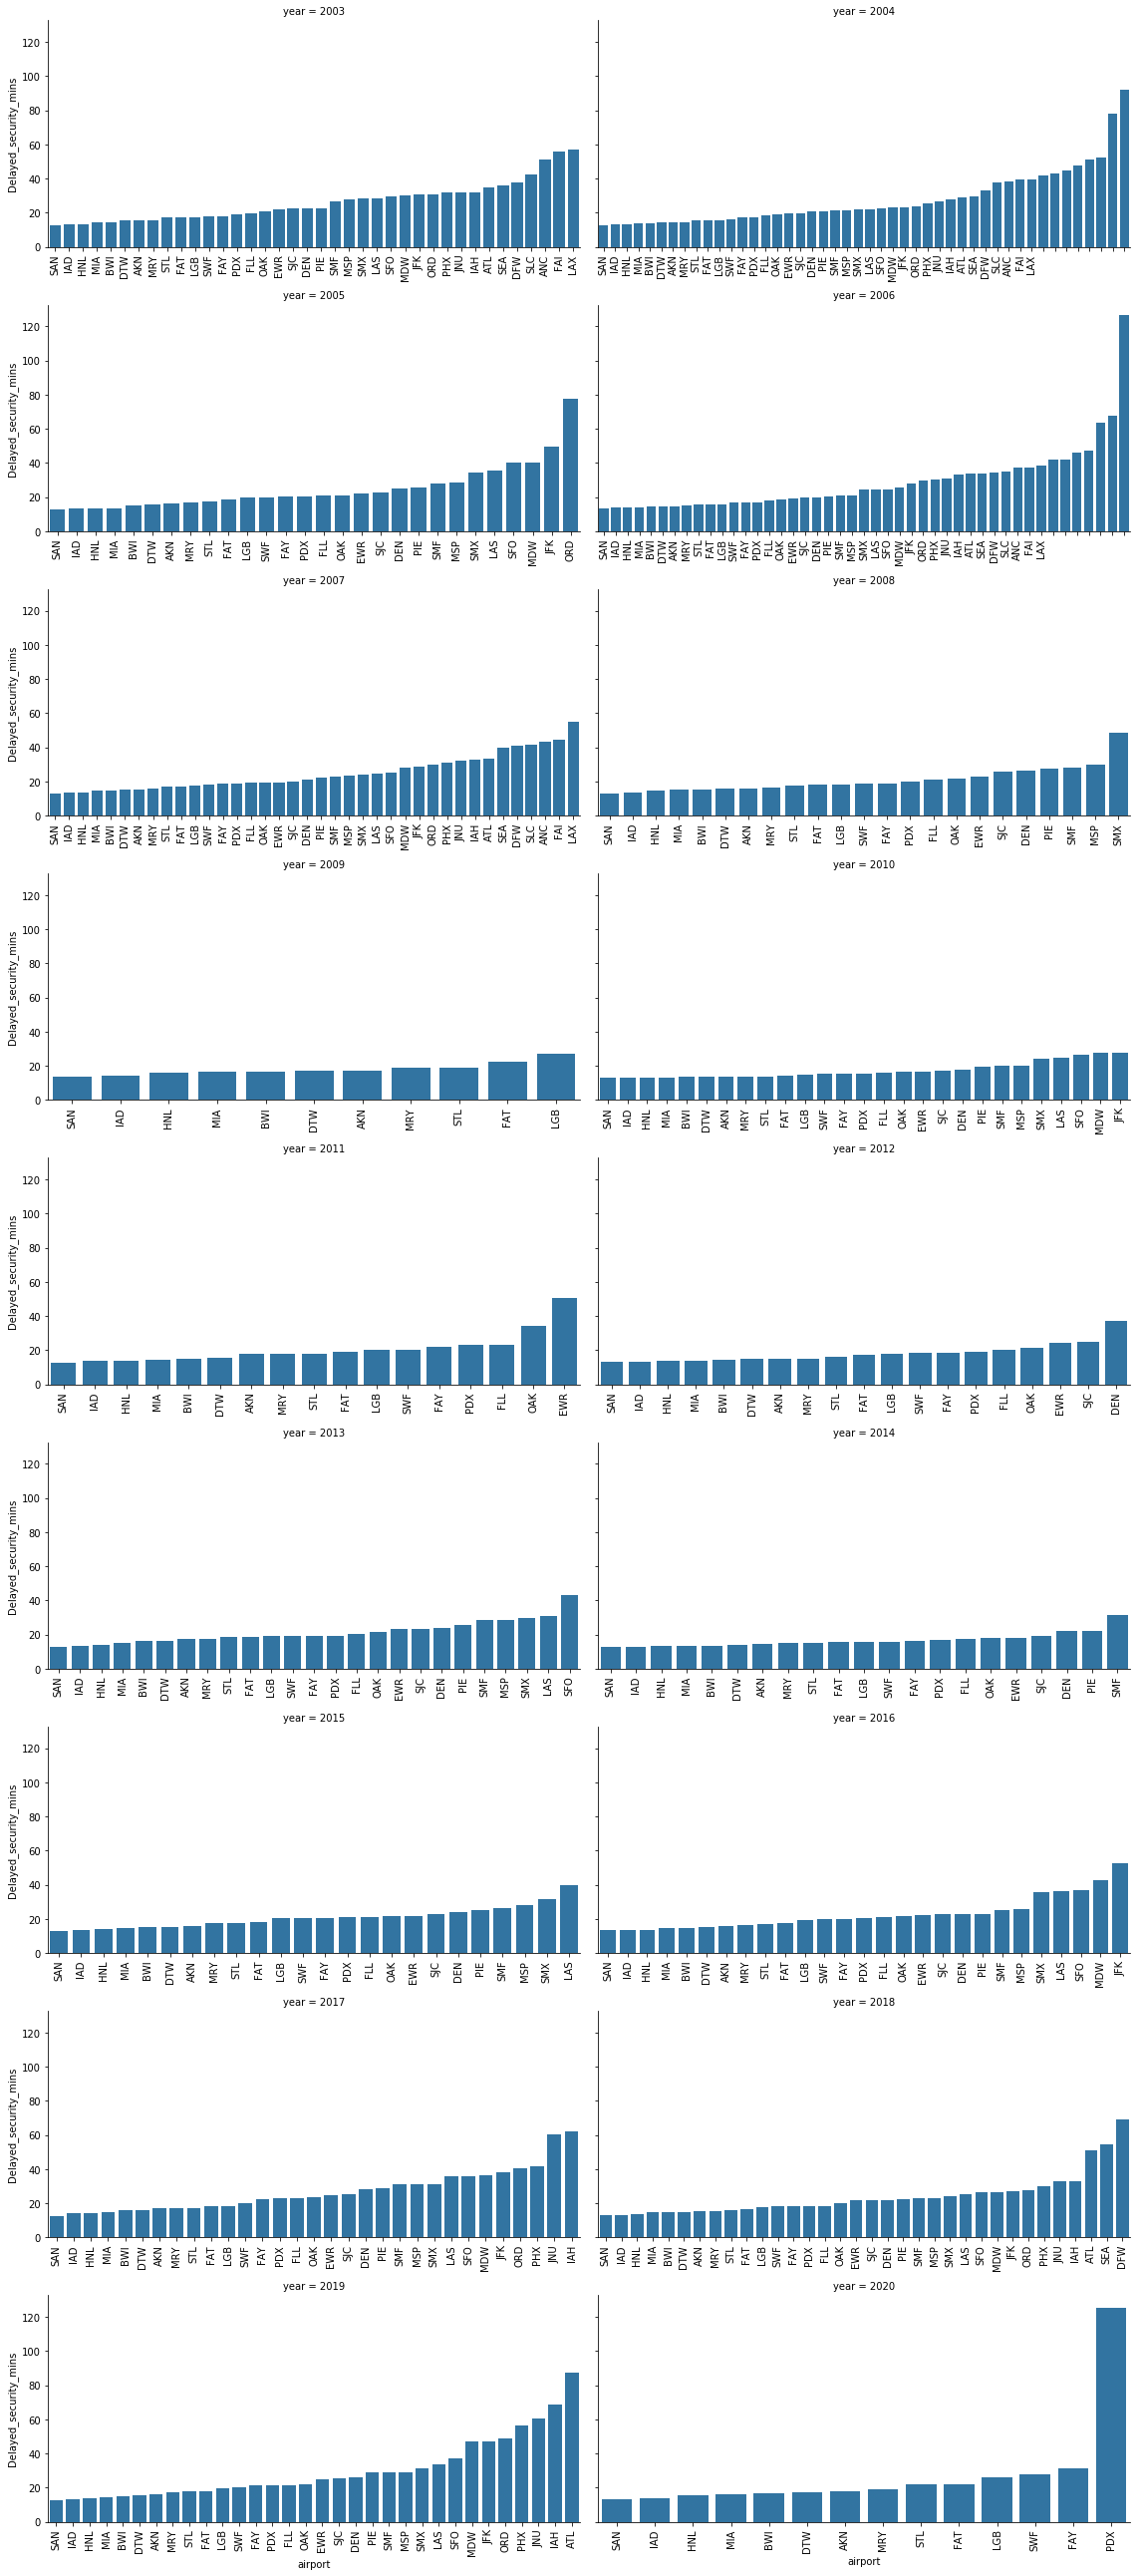

In [83]:
g=sb.FacetGrid(data=df_secu.tail(500),col='year',height=4,sharex=False,sharey=True,aspect=2,col_wrap=2,margin_titles=True)
g.map(sb.barplot,'airport','Delayed_security_mins')
g.set_xticklabels(rotation=90)
plt.tight_layout()

<b> The security delays over the years are generally expected to increase given that there is a rise in terrorists activities across the globe. But suprisingly years 2011-16 have showed a decreased delays in security after which this has re-started on its increaing trend. As expected JFK-NewYork city has the highest security delays in majarity of the years followed by Los angeles, Atlanta and Portland

<b> Lets have a look at the Carrier's overall performance in terms of Delay counts across the years </b>

In [38]:
#creating a pivot table for using it in a heatmap
g1=df_clean.groupby(['year','carrier']).mean()['Delayed_late_count']
g1=g1.reset_index(name='Delayed_late_count')
g1 = g1.pivot(index = 'year', columns = 'carrier',
                            values = 'Delayed_late_count')
g1

carrier,9E,AA,AQ,AS,B6,CO,DH,DL,EV,F9,...,OO,RU,TZ,UA,US,VX,WN,XE,YV,YX
year,,,,,,,,,,,,,,,,,,,,,
2003,NaN,28.611940,NaN,22.837500,8.707792,10.690813,11.260794,16.783673,10.107715,NaN,...,6.082749,12.156889,10.280612,26.260949,34.799517,NaN,96.777240,NaN,NaN,NaN
2004,NaN,38.732604,NaN,26.524771,16.420000,11.756670,33.834928,29.148671,4.604252,NaN,...,10.219708,14.798803,12.523364,29.488542,35.462707,NaN,147.115922,NaN,NaN,NaN
2005,NaN,40.708124,NaN,31.220183,31.181818,14.667785,20.251969,28.842400,5.796622,9.147541,...,10.137091,19.207174,7.790795,31.952528,39.117251,NaN,146.410788,NaN,NaN,NaN
2006,NaN,45.951446,10.878788,26.730419,31.097345,22.196721,NaN,25.578151,5.734177,6.901468,...,22.277633,23.707736,10.246914,44.990654,31.568789,NaN,154.408300,25.951965,18.081990,NaN
2007,10.783704,61.090329,8.946970,28.640884,33.189716,23.579254,NaN,23.105398,8.962691,8.307692,...,26.611498,NaN,NaN,52.825364,43.801242,NaN,160.695138,24.866202,15.637993,NaN
2008,9.444765,52.386266,5.409091,18.063636,31.039106,22.506562,NaN,22.546248,7.505818,7.752475,...,22.514925,NaN,NaN,43.543611,23.285417,NaN,157.233073,20.370979,7.184040,NaN
2009,7.050751,34.544070,NaN,10.569948,22.315789,14.573082,NaN,19.870577,23.235202,14.802966,...,23.332734,NaN,NaN,27.003382,19.265934,NaN,117.638889,13.478640,0.962045,NaN
2010,9.401066,28.636069,NaN,7.123128,24.453721,11.231818,NaN,29.853423,17.058562,11.953908,...,29.473260,NaN,NaN,18.965358,16.396348,NaN,134.177184,19.463602,7.393248,NaN
2011,NaN,29.731296,NaN,6.788177,28.427835,13.518950,NaN,23.486239,20.938846,8.833631,...,28.223617,NaN,NaN,22.997644,19.080132,NaN,122.460373,24.396267,8.730315,NaN


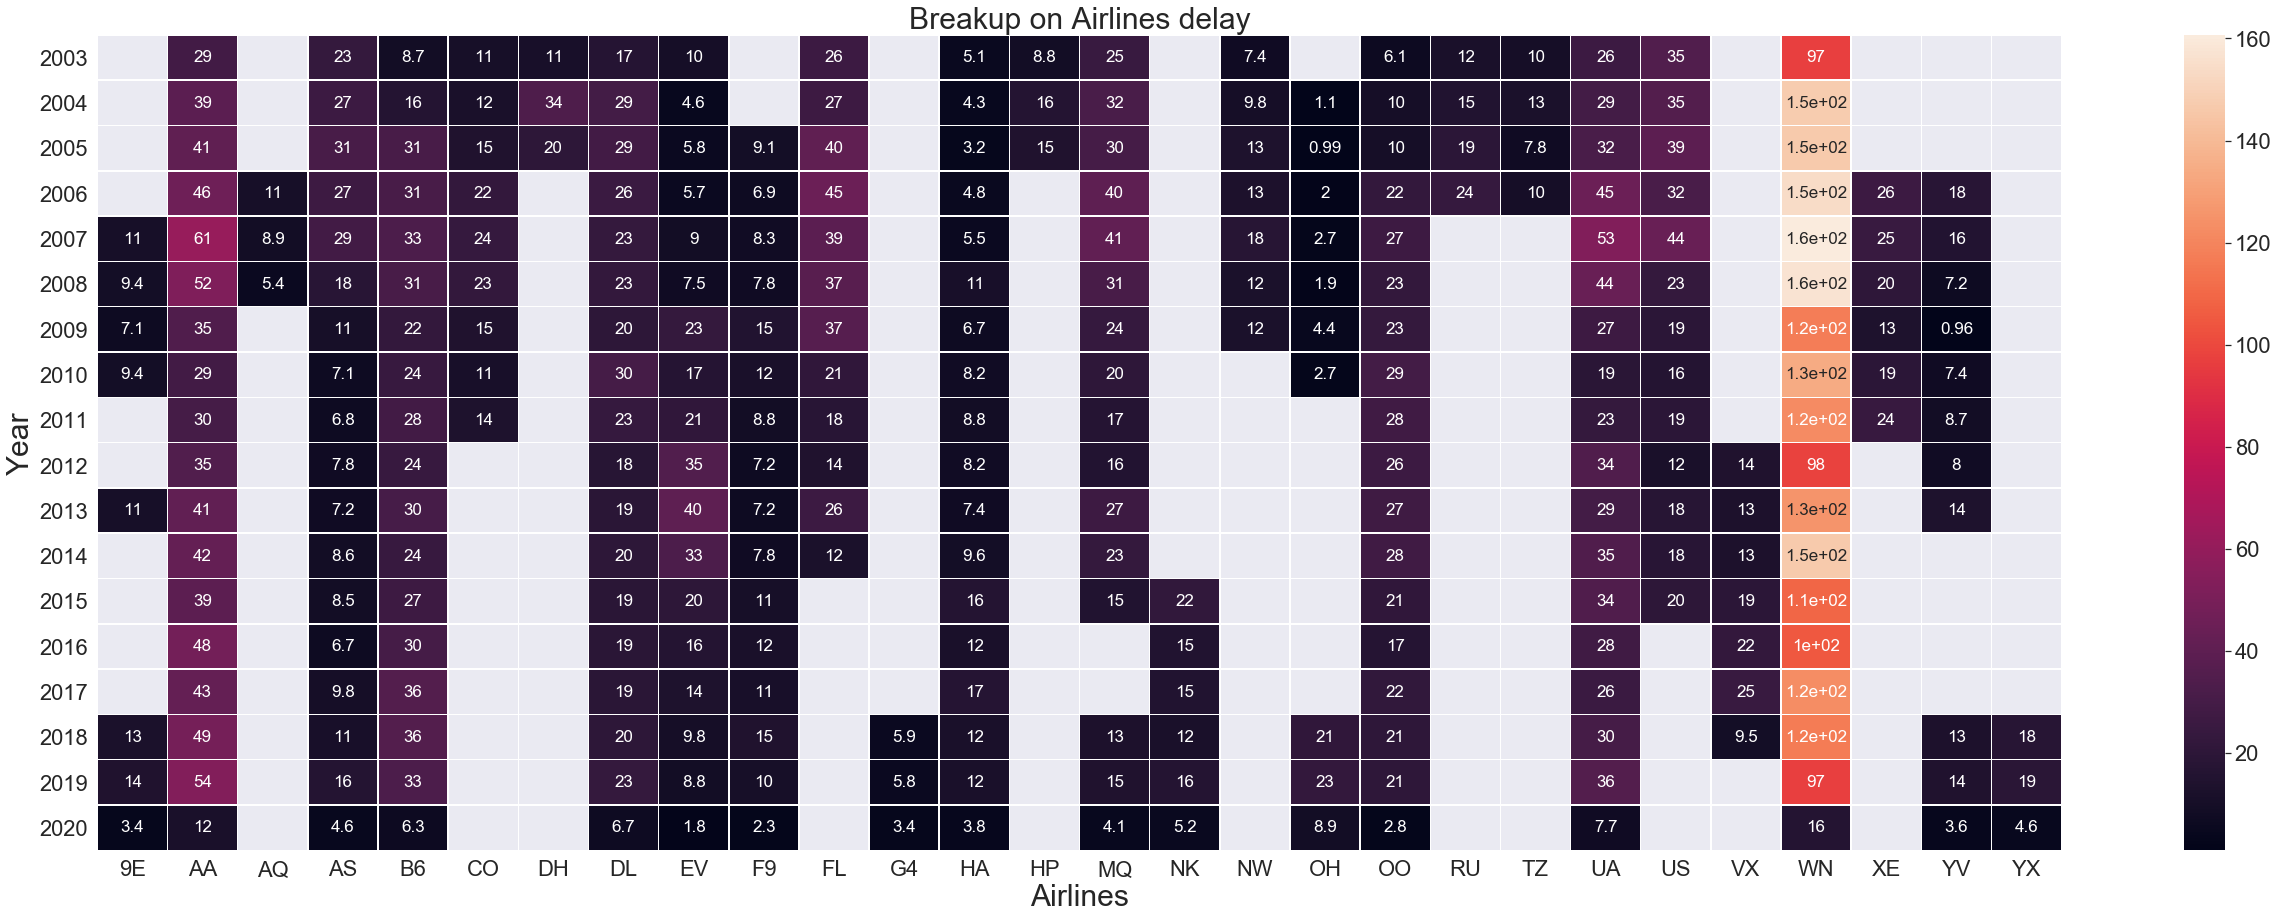

In [44]:
#visualiziing the late counts by airlines
plt.figure(figsize=(44,15))
sb.set(font_scale = 2)
sb.heatmap(data=g1,annot=True,linewidths=0.5,annot_kws={'size': 17})
plt.xlabel('Airlines',fontsize=30)
plt.ylabel('Year',fontsize=30)
plt.title('Breakup on Airlines delay',fontsize=30)
plt.yticks(rotation=0);

<b> While most of the Airlines are on par with each other in terms of running their aircraft on time, SouthWest airlines have been the worst maintained airline in terms of maintaining the promised timeline. </b> 

<b> Weather delays across seasons </b>

In [46]:
#grouping flights with months to weather delays
df_air_flights=df_clean.groupby('month')['Arrived_flights','Delayed_weather_count'].sum()
df_air_flights.reset_index(inplace=True)
df_air_flights.sort_values(by='Arrived_flights',ascending=True,inplace=True)

<Figure size 720x504 with 0 Axes>

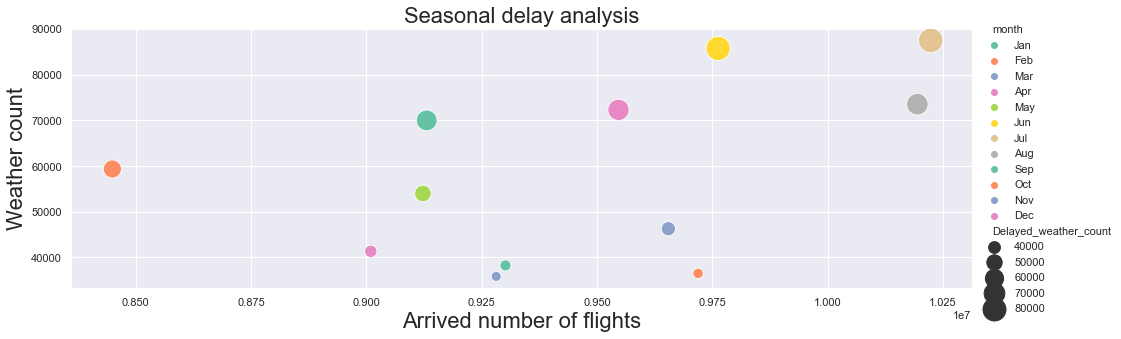

In [52]:
#using relplot to visulize the changes in the weather delays
plt.figure(figsize=[10,7])
sb.set(font_scale = 1)
sb.relplot(data=df_air_flights,x='Arrived_flights',y='Delayed_weather_count',hue='month',size='Delayed_weather_count',sizes=(100,600),palette="Set2",height=4.5,aspect=3)
plt.xlabel('Arrived number of flights',fontsize=22)
plt.ylabel('Weather count',fontsize=22)
plt.title('Seasonal delay analysis',fontsize=22);

<b> Interestingly the number of flights which had weather delays has increased between june-August which might indicate that the wettest part of the year while October-Decemeber has recorded the least weather delays, which are suprising given that snowfall occurs in this seasons </b> 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

SouthWest Airlines have the worst managed carrier, not only in terms of being late to destinations but also on the overall delays across the years
### Were there any interesting or surprising interactions between features?

The number of flights which have been delayed due to rains is more than the number of flights which have been delayed due to snowfall .

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!